<div style="background:#FFFFAA">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
<center>
<h1>Sample Starting Kit </h1>
 <br>This code was tested with <br>
Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
<br>
<br>
<br>
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
    <p>
In an era where computer graphics techniques for image generation are reaching stunning levels of quality, it becomes more and more challenging to detect fake from true, authentic images. However, this raises a lot of legal issues, mainly dealing with forgery. This project focuses mainly on the efficiency of Generative Adversarial Network (GAN) algorithms for producing art forgery and we will try to beat the state-of-the-art models that detect it. In fact, the Fine Arts Expert Institute in Geneva estimates that as much as 50 percent of artworks currently in circulation may be forgeries. Although the standard approach for image classification which is deep neural networks and especially Convolutional Neural Networks (CNNs) works very well nowadays, GAN performs strongly on generating fake images. By focusing on the art forgery aspect, we will try to bring a more specific perspective on the issue of image forgery.
 
 <br>
    <span style="color:red"> Keep the next block. </span>
</div>

In [64]:
%reload_ext autoreload
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div style="background:#FFFFAA">
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>
</div>

In [65]:
#data_dir = 'sample_data'              # Change this to the directory where you put the input data
data_dir = 'sample_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'perso'
!ls $data_dir

perso_feat.name    perso_test.data	perso_train.solution
perso_label.name   perso_test.solution	perso_valid.data
perso_public.info  perso_train.data	perso_valid.solution


In [66]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)          # The perso_data is loaded as a Pandas Data Frame

Reading sample_data/perso_train from AutoML format
Number of examples = 21
Number of features = 49152
   Class
0  False
1   True
Number of classes = 2


In [67]:
data.head()

,pixel_0_0_R,pixel_0_0_G,pixel_0_0_B,pixel_0_1_R,pixel_0_1_G,pixel_0_1_B,pixel_0_2_R,pixel_0_2_G,pixel_0_2_B,pixel_0_3_R,...,pixel_127_125_R,pixel_127_125_G,pixel_127_125_B,pixel_127_126_R,pixel_127_126_G,pixel_127_126_B,pixel_127_127_R,pixel_127_127_G,pixel_127_127_B,target
0,136,149,122,132,143,114,125,131,99,117,...,61,73,140,68,79,141,71,82,141,False
1,103,62,58,94,55,51,75,42,38,63,...,121,156,146,118,150,139,116,147,136,False
2,41,40,65,45,42,63,48,44,65,47,...,51,41,46,49,59,45,56,54,51,True
3,168,177,152,165,173,147,160,164,138,158,...,59,95,127,63,98,133,65,100,136,False
4,141,122,103,143,124,103,148,128,104,151,...,247,246,242,246,245,241,246,245,241,False


In [68]:
data_name

'perso'

In [69]:
from data_manager import DataManager
import matplotlib.pyplot as plt
D = DataManager(data_name, data_dir, replace_missing=True)

Info file found : /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_data/perso_public.info


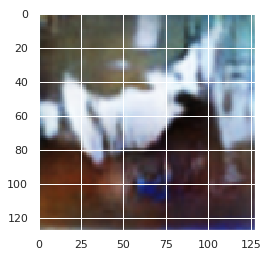

In [70]:
train_image = D.data['X_train']
image = (train_image[0].reshape(128,128,3))/255
plt.title("an exemple of a fake image")
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(image, interpolation='nearest')
plt.show()

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [71]:
data.describe() 

,pixel_0_0_R,pixel_0_0_G,pixel_0_0_B,pixel_0_1_R,pixel_0_1_G,pixel_0_1_B,pixel_0_2_R,pixel_0_2_G,pixel_0_2_B,pixel_0_3_R,...,pixel_127_124_B,pixel_127_125_R,pixel_127_125_G,pixel_127_125_B,pixel_127_126_R,pixel_127_126_G,pixel_127_126_B,pixel_127_127_R,pixel_127_127_G,pixel_127_127_B
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,131.714286,137.904762,138.476190,134.523810,138.761905,138.809524,134.714286,139.333333,138.095238,131.761905,...,141.047619,104.714286,123.952381,141.333333,100.000000,122.285714,138.142857,103.857143,123.666667,138.761905
std,63.420929,68.320498,71.379702,65.148767,68.306592,71.350977,64.260519,66.315408,70.708489,66.224546,...,77.128773,72.241361,72.338424,76.460011,72.143607,72.920603,78.730735,71.111381,73.385512,76.653053
min,29.000000,34.000000,35.000000,31.000000,38.000000,37.000000,36.000000,42.000000,38.000000,26.000000,...,25.000000,26.000000,23.000000,24.000000,22.000000,21.000000,23.000000,20.000000,20.000000,23.000000
25%,77.000000,69.000000,77.000000,77.000000,73.000000,75.000000,77.000000,97.000000,85.000000,74.000000,...,83.000000,51.000000,73.000000,92.000000,46.000000,62.000000,73.000000,55.000000,65.000000,94.000000
50%,140.000000,149.000000,122.000000,141.000000,143.000000,118.000000,134.000000,131.000000,104.000000,133.000000,...,136.000000,71.000000,98.000000,140.000000,75.000000,101.000000,139.000000,77.000000,100.000000,136.000000
75%,171.000000,182.000000,200.000000,177.000000,187.000000,198.000000,178.000000,187.000000,203.000000,181.000000,...,224.000000,160.000000,176.000000,221.000000,147.000000,171.000000,219.000000,146.000000,177.000000,214.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


### Pie Chart
The pie chart below shows that there is a little more fake samples than true samples in the train data.

(-1.1098082985575433,
 1.100467111310395,
 -1.1172277565136581,
 1.1086646936274804)

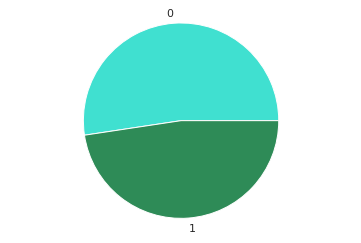

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
data_solution = pd.read_csv("sample_data/perso_train.solution",header=None) 
data_solution.rename(columns={ data_solution.columns[0]: "solution" }, inplace=True)
counts = data_solution['solution'].value_counts()
values = data_solution['solution'].unique()
colors = ['turquoise', 'seagreen']
plt.pie(counts, labels=values, colors=colors)
plt.axis('equal')

### Histograms
Next, we can use histograms to represent the distribution of the data. 
By calling the function matplotlib.pyplot.hist(), we get histograms displaying the number of features (columns) belonging to each range of values for the mean, the std and the max.

These graphs show that there are very few gaps between the values of each feature. For example, all features have values between 0 and 1 and a mean between 0.45 and 0.65.

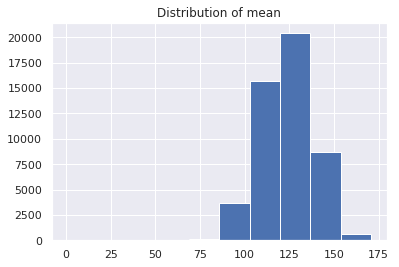

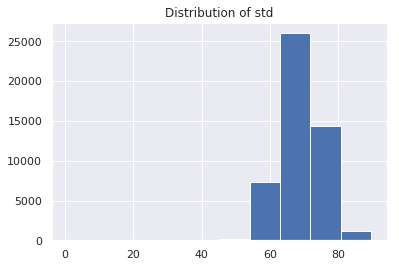

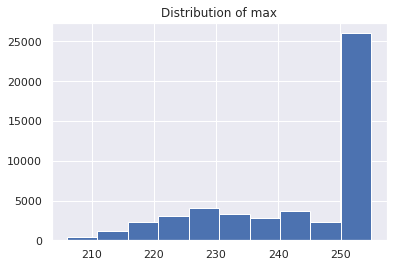

In [73]:
# statistics of 1024 features
g1=data.mean()
plt.title("Distribution of mean")
g1.hist()
plt.show()

g2=data.std()
plt.title("Distribution of std")
g2.hist()
plt.show()

g3=list(data.max())
g3.pop()
plt.title("Distribution of max")
plt.hist(g3)
plt.show()

<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [78]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)
print(data_name)

Info file found : /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_data/perso_public.info
DataManager : perso
info:
	usage = Sample dataset perso data
	name = perso
	task = bi-class.classification
	target_type = Numerical
	feat_type = Numerical
	metric = bac_metric
	time_budget = 1200
	feat_num = 49152
	target_num = 2
	label_num = 2
	train_num = 50000
	valid_num = 9409
	test_num = 18816
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(21, 49152)
	Y_train = array(21,)
	X_valid = array(3, 49152)
	Y_valid = array(3,)
	X_test = array(6, 49152)
	Y_test = array(6,)
feat_type:	array(49152,)
feat_idx:	array(0,)

perso


In [79]:
from numpy.core.umath_tests import inner1d
from data_io import write
from model import model

<div style="background:#FFFFAA">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [80]:
#Model CNN with Keras based on Theano
M = model()
trained_model_name = model_dir + data_name
print(data_name)
print(model_dir)
print(trained_model_name)
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)  

perso
sample_code_submission/
sample_code_submission/perso


In [81]:
from os.path import isfile
from sklearn.base import BaseEstimator
from sklearn import tree
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras import backend as K

<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [82]:
if not(M.is_trained):
    X_train = D.data['X_train'].reshape(-1,128,128,3)
    Y_train = D.data['Y_train']
    M.fit(X_train, Y_train)                     


FIT: dim(X)= [21, 128]
FIT: dim(y)= [21, 1]
Epoch 1/10
21/21 [==============================] - 1s 28ms/step - loss: 6.3614 - acc: 0.4762
Epoch 2/10
21/21 [==============================] - 0s 23ms/step - loss: 6.5027 - acc: 0.4286
Epoch 3/10
21/21 [==============================] - 0s 23ms/step - loss: 7.0888 - acc: 0.4286
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 6.4656 - acc: 0.3810
Epoch 5/10
21/21 [==============================] - 1s 24ms/step - loss: 1.6109 - acc: 0.5476
Epoch 6/10
21/21 [==============================] - 1s 24ms/step - loss: 2.6510 - acc: 0.5476
Epoch 7/10
21/21 [==============================] - 1s 26ms/step - loss: 2.5381 - acc: 0.5952
Epoch 8/10
21/21 [==============================] - 0s 24ms/step - loss: 1.2824 - acc: 0.4762
Epoch 9/10
21/21 [==============================] - 1s 24ms/step - loss: 2.0626 - acc: 0.5238
Epoch 10/10
21/21 [==============================] - 0s 23ms/step - loss: 1.2127 - acc: 0.4524


In [83]:
Y_hat_train = M.predict(D.data['X_train'].reshape(-1,128,128,3))
Y_hat_valid = M.predict(D.data['X_valid'].reshape(-1,128,128,3))
Y_hat_test = M.predict(D.data['X_test'].reshape(-1,128,128,3))
Y_test = D.data['Y_test']
Y_valid = D.data['Y_valid']

PREDICT: dim(X)= [21, 128]
PREDICT: dim(y)= [21, 1]
PREDICT: dim(X)= [3, 128]
PREDICT: dim(y)= [3, 1]
PREDICT: dim(X)= [6, 128]
PREDICT: dim(y)= [6, 1]


<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [90]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/perso_test.predict
sample_result_submission/perso_train.predict
sample_result_submission/perso_valid.predict


<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

#### Metric : AUC_metric 
ROC curves are typically used in binary classification to study the output of a classifier

In [85]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: roc_auc_score


<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

You can add here other scores and result visualization.

Training score for the roc_auc_score metric = 0.8000
Ideal score for the roc_auc_score metric = 1.0000
Test score for the roc_auc_score metric = 0.5000
Valid score for the roc_auc_score metric = 0.5000


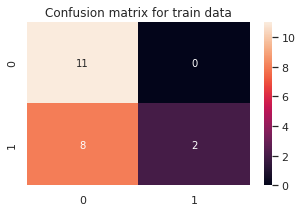

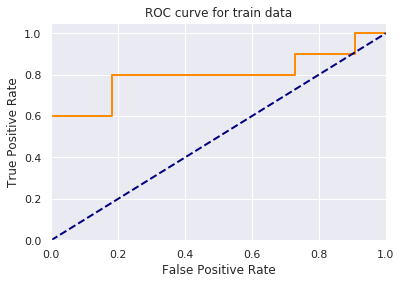

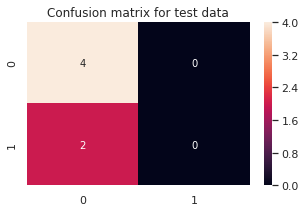

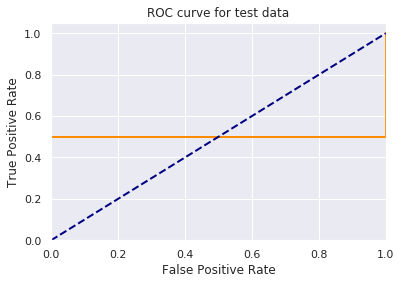

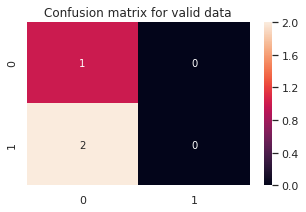

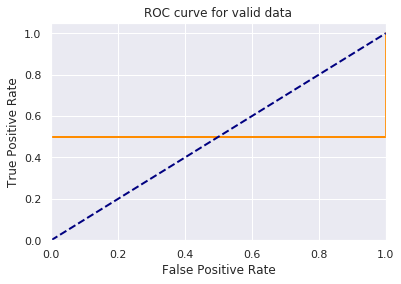

In [86]:
#AUC_metric
import numpy as np
import pandas as pd
from sklearn import metrics
n_classes=2
def fpr_tpr(solution, prediction):
    #fpr, tpr, thresholds = metrics.roc_curve(solution, prediction, pos_label=1)
    for i in range(n_classes):
        fpr, tpr, _ = metrics.roc_curve(solution, prediction)
        roc_auc = metrics.auc(fpr, tpr)
    return (fpr,tpr)

fpr_train,tpr_train = fpr_tpr(Y_train, Y_hat_train)
fpr_test,tpr_test = fpr_tpr(Y_test, Y_hat_test)
fpr_valid,tpr_valid = fpr_tpr(Y_valid, Y_hat_valid)

print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_test, Y_hat_test))
print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_valid, Y_hat_valid))

#Confusion matrix for AUC_metric
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
def p2c(prediction,threshold=0.5) : 
    c = []
    for ele in prediction : 
        if(ele>=0.5) : 
            c.append(1)
        else : 
            c.append(0)
    return np.array(c)


def plot_cm_matrix(solution,prediction,title) :
    prediction = p2c(prediction)
    cm = confusion_matrix(solution, prediction)
    df_cm = pd.DataFrame(cm, index = [i for i in "01"],columns = [i for i in "01"])
    plt.figure(figsize = (5,3))
    sn.heatmap(df_cm, annot=True)
    plt.title(title)

def plot_ROC(fpr,tpr,title) :
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

plot_cm_matrix(Y_train,Y_hat_train,"Confusion matrix for train data") 
plot_ROC(fpr_train,tpr_train,"ROC curve for train data")
plot_cm_matrix(Y_test,Y_hat_test,"Confusion matrix for test data") 
plot_ROC(fpr_test,tpr_test,"ROC curve for test data")
plot_cm_matrix(Y_valid,Y_hat_valid,"Confusion matrix for valid data") 
plot_ROC(fpr_valid,tpr_valid,"ROC curve for valid data")

<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [87]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=4, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [15, 128]
FIT: dim(y)= [15, 1]
Epoch 1/10
15/15 [==============================] - 0s 24ms/step - loss: 4.2747 - acc: 0.5667
Epoch 2/10
15/15 [==============================] - 0s 23ms/step - loss: 4.8072 - acc: 0.5333
Epoch 3/10
15/15 [==============================] - 0s 20ms/step - loss: 6.1531 - acc: 0.5333
Epoch 4/10
15/15 [==============================] - 0s 20ms/step - loss: 2.5919 - acc: 0.5667
Epoch 5/10
15/15 [==============================] - 0s 21ms/step - loss: 6.0722 - acc: 0.5667
Epoch 6/10
15/15 [==============================] - 0s 21ms/step - loss: 3.4125 - acc: 0.6000
Epoch 7/10
15/15 [==============================] - 0s 20ms/step - loss: 1.9173 - acc: 0.5000
Epoch 8/10
15/15 [==============================] - 0s 20ms/step - loss: 2.0276 - acc: 0.5667
Epoch 9/10
15/15 [==============================] - 0s 21ms/step - loss: 1.0339 - acc: 0.6333
Epoch 10/10
15/15 [==============================] - 0s 20ms/step - loss: 0.5469 - acc: 0.8333
PREDICT: dim(X)

<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [88]:
!python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using Theano backend.
Using input_dir: /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_data
Using output_dir: /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_result_submission
Using program_dir: /home/min/Téléchargements/PersoData/starting_kit_real_image/ingestion_program
Using submission_dir: /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Perso ********
************************************************
========= Reading and converting data ==========
Info file found : /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_data/perso_public.info
========= Reading /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_data/perso_feat.type
[+] Success in  0.01 sec
========= Reading /home/min/Téléchargements/PersoData/starting_kit_real_image/sample_data/perso_train.d

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [91]:
scoring_output_dir = '../scoring_output_dir'
!python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Perso_test): roc_auc_score(set1_score)=0.500000000000 =======
======= Set 2 (Perso_train): roc_auc_score(set2_score)=0.800000000000 =======
======= Set 3 (Perso_valid): roc_auc_score(set3_score)=0.500000000000 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [92]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_19-01-14-22-24.zip
../sample_result_submission_19-01-14-22-24.zip
